In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/leapgestrecog


In [28]:
import os


data_path = '/kaggle/input/leapgestrecog'

print("Contents of the folder:", os.listdir(data_path))


محتويات المجلد: ['leapGestRecog', 'leapgestrecog']


In [44]:
import os

data_path = '/kaggle/input/leapgestrecog'

# The 'leapGestRecog' folder is directly under data_path
folder1_path = os.path.join(data_path, 'leapGestRecog')

print("folder leapGestRecog:", os.listdir(folder1_path))


for gesture in os.listdir(folder1_path):
    gesture_path = os.path.join(folder1_path, gesture)

    if os.path.isdir(gesture_path):
        print(f" folder contents {gesture}:", os.listdir(gesture_path))


محتويات مجلد leapGestRecog: ['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']
محتويات المجلد 07: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
محتويات المجلد 05: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
محتويات المجلد 06: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
محتويات المجلد 02: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
محتويات المجلد 04: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
محتويات المجلد 00: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']
محتويات المجلد 08: ['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '0

In [45]:
data_path = '/kaggle/input/leapgestrecog/leapGestRecog'

X = []
y = []


gesture_labels = {
    '01_palm': 0,
    '02_l': 1,
    '03_fist': 2,
    '04_fist_moved': 3,
    '05_thumb': 4,
    '06_index': 5,
    '07_ok': 6,
    '08_palm_moved': 7,
    '09_c': 8
}


for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)


    for gesture in os.listdir(folder_path):
        gesture_path = os.path.join(folder_path, gesture)


        if os.path.isdir(gesture_path) and gesture in gesture_labels:
            for img_name in os.listdir(gesture_path):
                img_path = os.path.join(gesture_path, img_name)


                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:

                    img = cv2.resize(img, (64, 64))
                    X.append(img)
                    y.append(gesture_labels[gesture])


X = np.array(X)
y = np.array(y)

print("Numbers of Images:", X.shape[0])
print("Number of Classes:", len(np.unique(y)))

Numbers of Images: 18000
Number of Classes: 9


In [73]:
X = X.reshape(-1, 64, 64, 1).astype('float32') / 255.0
y_cat = to_categorical(y, num_classes=9)

In [74]:
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test_cat, test_size=0.5, stratify=y_test_cat, random_state=42)

In [75]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,1)),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(9,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,681 (2.61 MB)

 Trainable params: 684,233 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [79]:
Batch=32
epochs=10
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
history=model.fit(X_train,y_train_cat,epochs=epochs,batch_size=Batch,validation_data=(X_val,y_val))

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7382 - loss: 0.8291 - val_accuracy: 0.5333 - val_loss: 1.2351
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9911 - val_loss: 0.0225
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9923 - loss: 0.0272 - val_accuracy: 0.9872 - val_loss: 0.0683
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9920 - loss: 0.0291 - val_accuracy: 0.9961 - val_loss: 0.0192
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9914 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 5.1758e-05
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9977 - loss: 0.0101 - val_accuracy: 0.9994 - val_loss: 7.2472e-04
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9949 - loss: 0.0215 - val_acc

In [81]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 1.5019e-04

✅ Test Accuracy: 0.9994


In [82]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [83]:
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes))


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      0.99      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



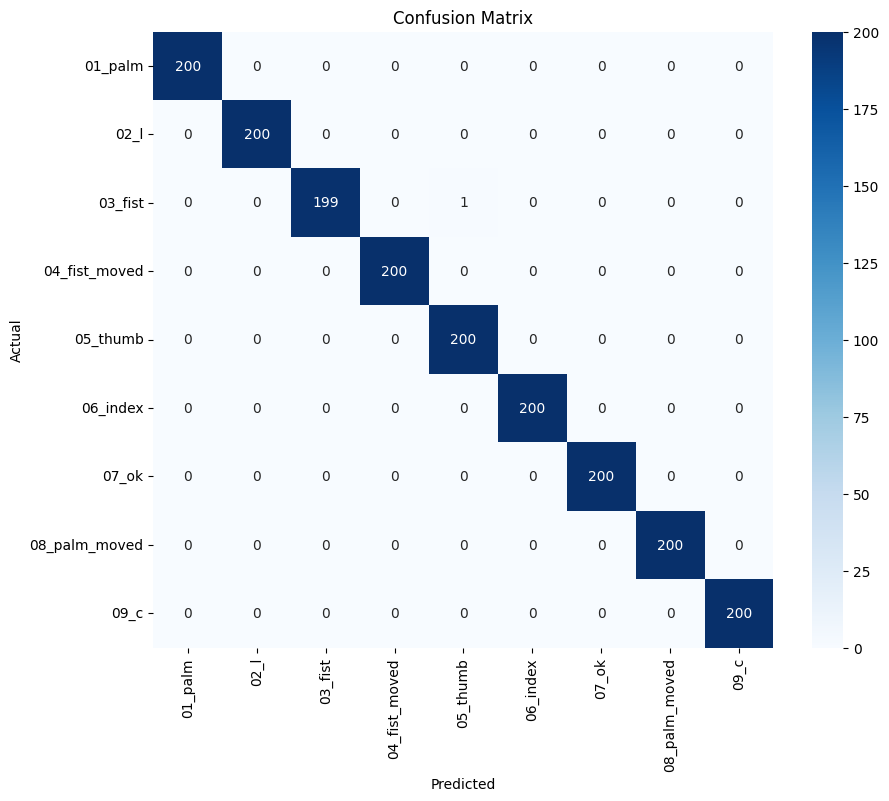

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gesture_labels.keys(), yticklabels=gesture_labels.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

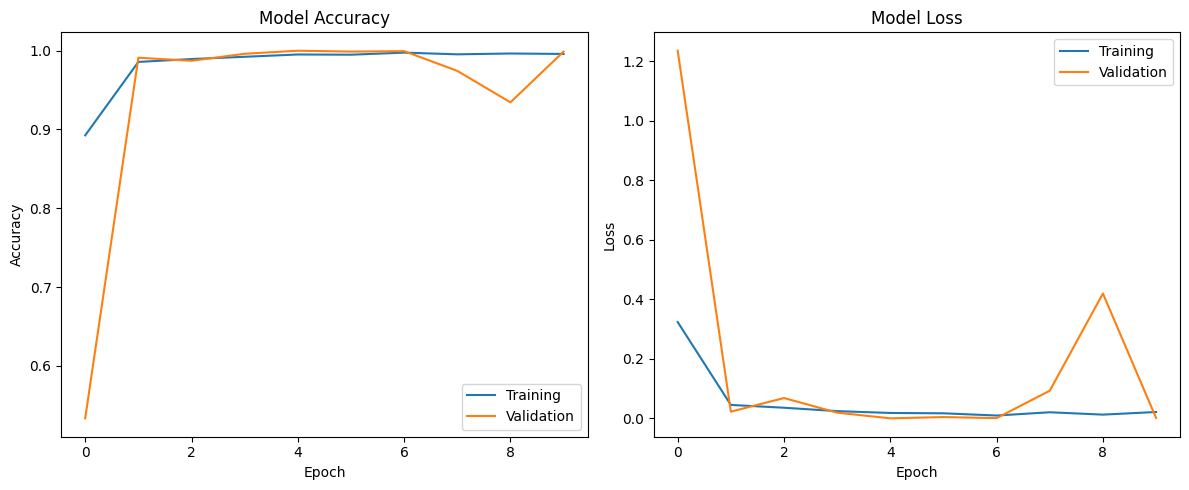

In [86]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


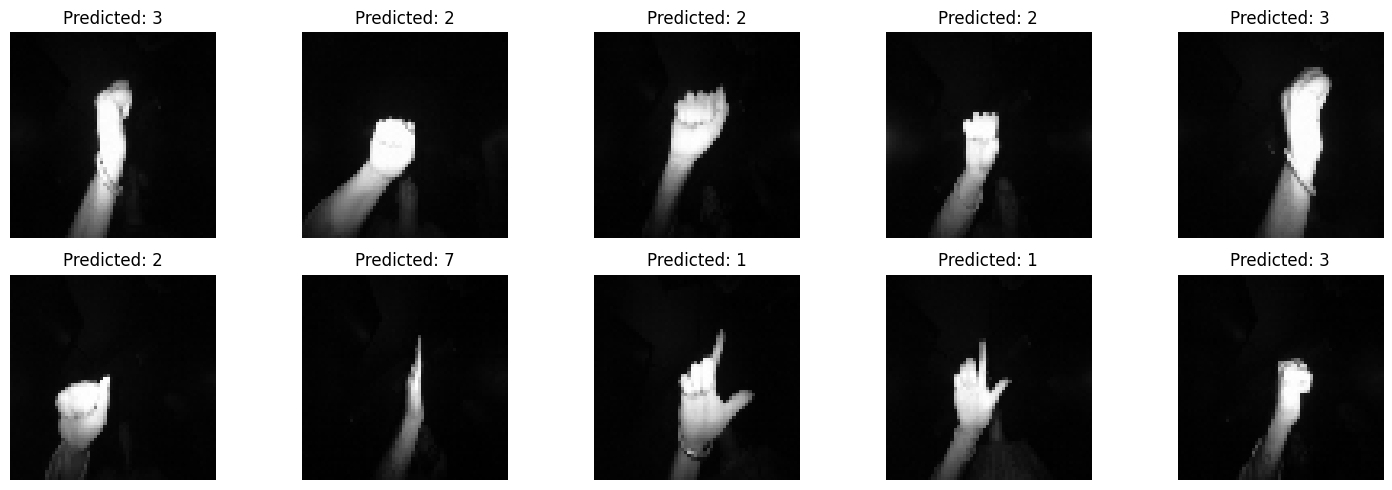

In [87]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Show 10 random images with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()